In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from gensim.models import Word2Vec, KeyedVectors
import re
from gensim.downloader import load
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from transformers import BertTokenizer, BertModel
import torch

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [3]:
df.tail()

,Text,Label
2220,India opens skies to competition\n \n India wi...,4
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...,4
2222,Survey confirms property slowdown\n \n Governm...,4
2223,High fuel prices hit BA's profits\n \n British...,4
2224,US trade gap hits record in 2004\n \n The gap ...,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [5]:
df.describe()

,Label
count,2225.000000
mean,2.027416
std,1.438694
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [6]:
df.shape

(2225, 2)

In [7]:
df.isna().sum()

Text     0
Label    0
dtype: int64

In [8]:
df.nunique()

Text     2127
Label       5
dtype: int64

In [9]:
df.Label.value_counts()

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

In [10]:
df.duplicated().sum()

98

In [11]:
df.drop_duplicates(keep='last', inplace=True)

In [12]:
df.duplicated().sum()

0

Text: It contains different categories of text data
Label: It contains labels for five different categories : 0,1,2,3,4


Politics = 0
Sport = 1
Technology = 2
Entertainment =3
Business = 4

In [13]:
df.replace({0:"Politics", 1:"Sport", 2:"Technology", 3:"Entertainment", 4:"Business"}, inplace=True)
df.Label.value_counts()

Label
Sport            505
Business         503
Politics         403
Entertainment    369
Technology       347
Name: count, dtype: int64

In [14]:
df.dtypes

Text     object
Label    object
dtype: object

In [15]:
label = df.Label.value_counts()
transuction = label.index
quantity = label.values

# draw pie circule with plotly
figure = px.pie(df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Label distribution of the Text')
figure.show()

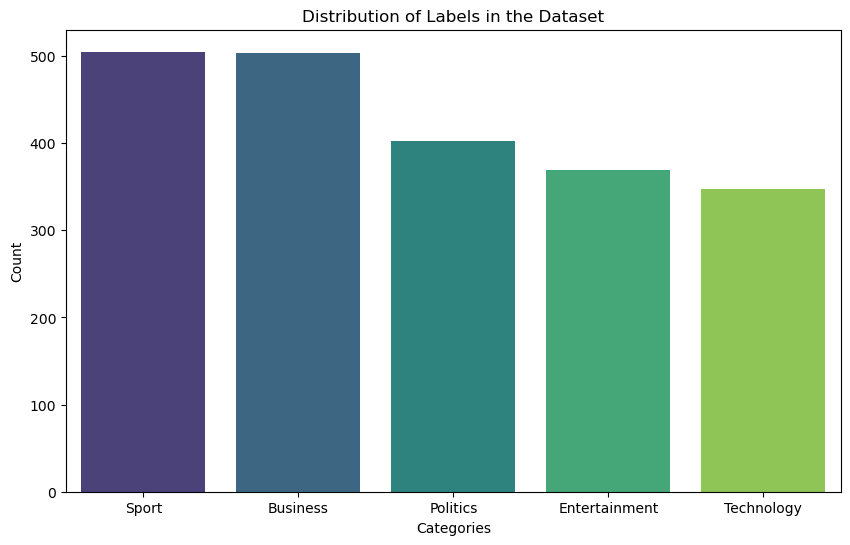

In [16]:
# Bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df, order=df['Label'].value_counts().index, palette='viridis')
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

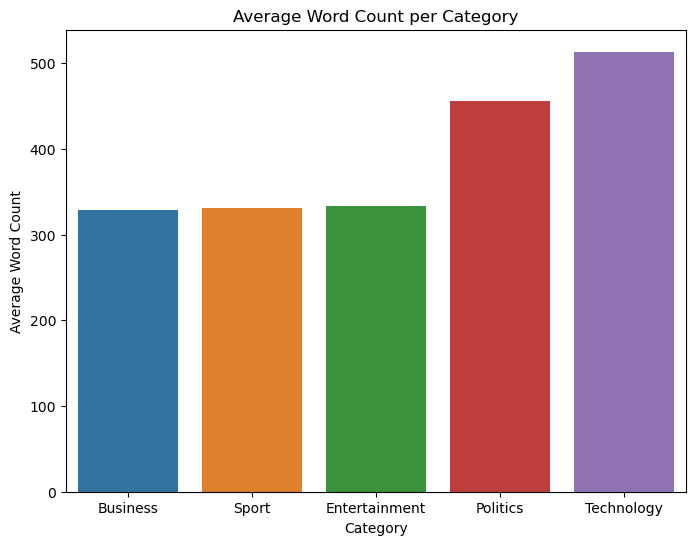

In [17]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

avg_word_count = df.groupby('Label')['word_count'].mean().sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=avg_word_count.index, y=avg_word_count.values)
plt.title('Average Word Count per Category')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.show()

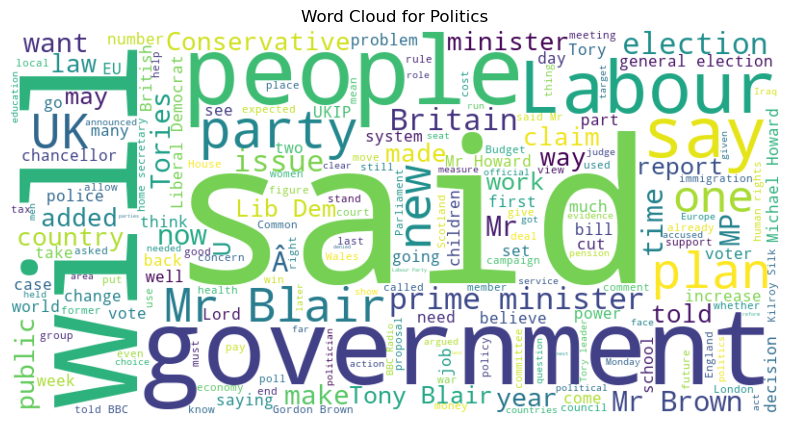

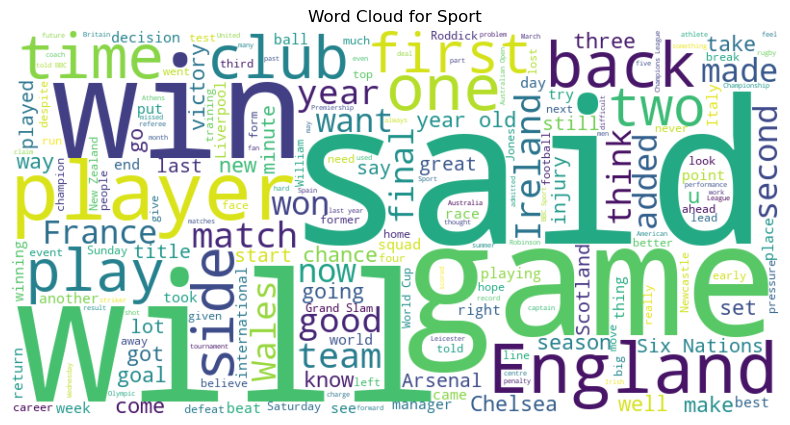

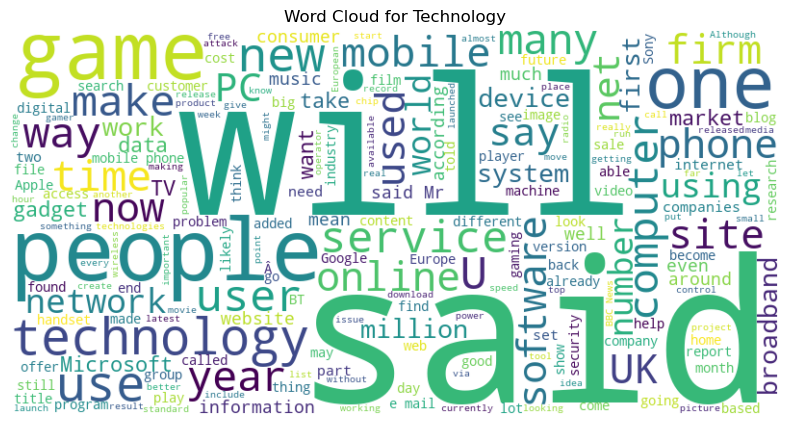

In [18]:
from wordcloud import WordCloud

categories = df['Label'].unique()

for category in categories:
    subset = df[df['Label'] == category]
    text = " ".join(subset['Text'].values)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()